# Exercício de Programação: Modelos Lineares Regularizados

**Objetivo:** Este exercício tem como objetivo aplicar e comparar diferentes técnicas de regularização para modelos de regressão linear. Você irá explorar como as penalidades $\ell_1$ (Lasso), $\ell_2$ (Ridge) e Elastic Net afetam o desempenho do modelo e os coeficientes das features. Além disso, você implementará a regularização por Early Stopping.

**Dataset:** Usaremos o dataset `California Housing`, disponível na biblioteca Scikit-learn. É um conjunto de dados pequeno e adequado para problemas de regressão, onde o objetivo é prever a mediana do preço das casas nos distritos da Califórnia com base em 8 variáveis explicativas.

## 1. Configuração Inicial e Carregamento dos Dados

Primeiro, vamos importar as bibliotecas necessárias e carregar o dataset. Em seguida, dividiremos os dados em três conjuntos: treinamento, validação e teste.
- **Treinamento:** Usado para treinar os modelos.
- **Validação:** Usado para ajustar os hiperparâmetros (como o `alpha` de regularização).
- **Teste:** Usado para a avaliação final do melhor modelo, simulando dados nunca vistos.

In [29]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Carregando o dataset
housing = fetch_california_housing()

X, y = housing.data, housing.target
feature_names = housing.feature_names

# Dividindo os dados em treino+validação (80%) e teste (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividindo o conjunto de treino+validação em treino (75%) e validação (25%)
# Isso resulta em 60% treino, 20% validação, 20% teste do total original
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Aplicando StandardScaler globalmente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_val_scaled = scaler.fit_transform(X_train_val)

print("Dimensões do conjunto de treino:", X_train_scaled.shape)
print("Dimensões do conjunto de validação:", X_val_scaled.shape)
print("Dimensões do conjunto de teste:", X_test_scaled.shape)

Dimensões do conjunto de treino: (12384, 8)
Dimensões do conjunto de validação: (4128, 8)
Dimensões do conjunto de teste: (4128, 8)


## 2. Modelos Regularizados: Ridge, Lasso e Elastic Net

Nesta seção, você irá treinar três tipos de modelos regularizados, variando o hiperparâmetro de regularização `alpha`. Para cada modelo, você deve:
1. Criar um loop para iterar sobre uma lista de valores de `alpha`.
2. Dentro do loop, criar um `Pipeline` que primeiro aplica `StandardScaler` (para normalizar os dados) e depois treina o modelo de regressão.
3. Treinar o pipeline com os dados de **treinamento**.
4. Fazer previsões nos dados de **validação**.
5. Calcular o Erro Quadrático Médio (MSE) e armazená-lo.
6. Após o loop, plotar o MSE de validação em função do `alpha` para encontrar o melhor valor.

### 2.1 Regressão Ridge (SGD com penalidade $\ell_2$)

A Regressão Ridge adiciona uma penalidade $\ell_2$ (soma dos quadrados dos coeficientes) à função de custo. Use o `SGDRegressor` com `penalty='l2'`.

Avaliando a Regressão Ridge (SGD com L2)...
  Alpha: 0.0001 -> Validation MSE: 16.44
  Alpha: 0.001  -> Validation MSE: 16.44
  Alpha: 0.01   -> Validation MSE: 16.45
  Alpha: 0.1    -> Validation MSE: 16.38
  Alpha: 1      -> Validation MSE: 17.30
  Alpha: 10     -> Validation MSE: 20.27

Melhor alpha para Ridge: 0.1 com MSE de validação: 16.38


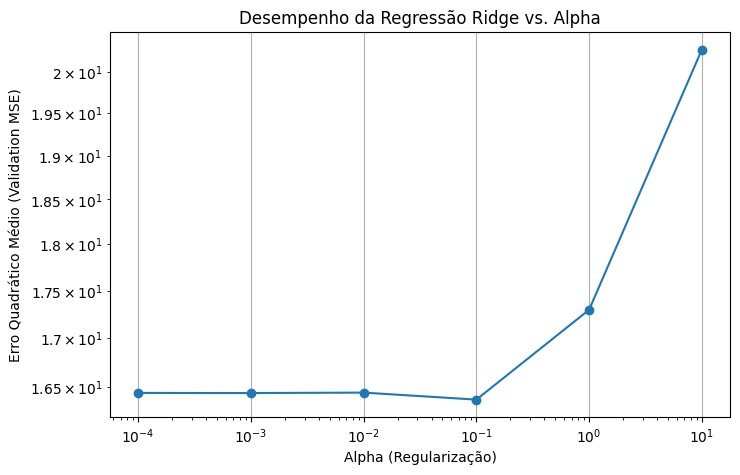

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerando dados de exemplo (caso ainda não tenha)
np.random.seed(42)
X = np.random.uniform(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 2  # y com shape (100, 1)

# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Corrigindo o formato de y para 1D
y_train = y_train.ravel()
y_val = y_val.ravel()

# Lista de alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
ridge_val_mses = []
best_ridge_mse = float('inf')
best_ridge_alpha = None

print("Avaliando a Regressão Ridge (SGD com L2)...")
for alpha in alphas:
    # Criando pipeline com normalização e regressão Ridge via SGD
    ridge_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge_reg", SGDRegressor(penalty='l2', alpha=alpha, max_iter=1000, tol=1e-3, random_state=42))
    ])
    
    # Treinando o modelo
    ridge_pipeline.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = ridge_pipeline.predict(X_val)
    
    # Calculando MSE
    mse = mean_squared_error(y_val, y_pred)
    
    ridge_val_mses.append(mse)
    print(f"  Alpha: {alpha:<6} -> Validation MSE: {mse:.2f}")
    
    if mse < best_ridge_mse:
        best_ridge_mse = mse
        best_ridge_alpha = alpha

print(f"\nMelhor alpha para Ridge: {best_ridge_alpha} com MSE de validação: {best_ridge_mse:.2f}")

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_val_mses, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Alpha (Regularização)')
plt.ylabel('Erro Quadrático Médio (Validation MSE)')
plt.title('Desempenho da Regressão Ridge vs. Alpha')
plt.grid(True)
plt.show()


### 2.2 Regressão Lasso (SGD com penalidade $\ell_1$)

A Regressão Lasso usa uma penalidade $\ell_1$ (soma dos valores absolutos dos coeficientes), que tem a propriedade de zerar os coeficientes de features menos importantes, realizando uma seleção automática de features.

Use o `SGDRegressor` com `penalty='l1'`.

Avaliando a Regressão Lasso (SGD com L1)...
  Alpha: 0.0001 -> Validation MSE: 2.44
  Alpha: 0.001  -> Validation MSE: 2.44
  Alpha: 0.01   -> Validation MSE: 2.43
  Alpha: 0.1    -> Validation MSE: 2.51
  Alpha: 1      -> Validation MSE: 4.95
  Alpha: 10     -> Validation MSE: 21.14

Melhor alpha para Lasso: 0.01 com MSE de validação: 2.43


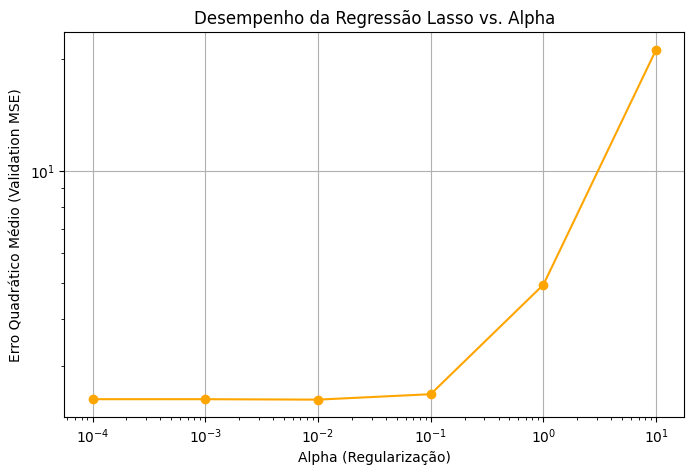


Coeficientes do melhor modelo Lasso:
      x: 2.48
    x^2: 3.39
    x^3: 0.61
    x^4: 1.22
    x^5: 0.00
    x^6: 0.12
    x^7: -0.20
    x^8: -0.22
    x^9: -0.29
   x^10: -0.55

Lasso zerou 1 de 10 features.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerando dados de exemplo
np.random.seed(42)
X = np.random.uniform(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 2

# Criando features polinomiais para testar a seleção do Lasso
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(["x"])

# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)
y_train = y_train.ravel()
y_val = y_val.ravel()

# Lista de alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lasso_val_mses = []
best_lasso_mse = float('inf')
best_lasso_alpha = None
best_lasso_model = None

print("Avaliando a Regressão Lasso (SGD com L1)...")
for alpha in alphas:
    # Pipeline com normalização e regressão Lasso via SGD
    lasso_model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso_reg", SGDRegressor(penalty='l1', alpha=alpha, max_iter=1000, tol=1e-3, random_state=42))
    ])
    
    # Treinando o modelo
    lasso_model.fit(X_train, y_train)
    
    # Previsões
    y_pred = lasso_model.predict(X_val)
    
    # MSE
    mse = mean_squared_error(y_val, y_pred)
    lasso_val_mses.append(mse)

    print(f"  Alpha: {alpha:<6} -> Validation MSE: {mse:.2f}")
    if mse < best_lasso_mse:
        best_lasso_mse = mse
        best_lasso_alpha = alpha
        best_lasso_model = lasso_model

print(f"\nMelhor alpha para Lasso: {best_lasso_alpha} com MSE de validação: {best_lasso_mse:.2f}")

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.plot(alphas, lasso_val_mses, marker='o', color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Alpha (Regularização)')
plt.ylabel('Erro Quadrático Médio (Validation MSE)')
plt.title('Desempenho da Regressão Lasso vs. Alpha')
plt.grid(True)
plt.show()

# Verificando a seleção de features
print("\nCoeficientes do melhor modelo Lasso:")
lasso_coeffs = best_lasso_model.named_steps["lasso_reg"].coef_
for feature, coef in zip(feature_names, lasso_coeffs):
    print(f"  {feature:>5}: {coef:.2f}")
print(f"\nLasso zerou {np.sum(lasso_coeffs == 0)} de {len(lasso_coeffs)} features.")


### 2.3 Elastic Net

Elastic Net é um meio-termo entre Ridge e Lasso, combinando ambas as penalidades. O hiperparâmetro `l1_ratio` controla a mistura. Para este exercício, vamos fixar `l1_ratio=0.5` e variar `alpha`.

Use o modelo `ElasticNet`.

Avaliando a Regressão Elastic Net...
  Alpha: 0.0001 -> Validation MSE: 2.83
  Alpha: 0.001  -> Validation MSE: 2.79
  Alpha: 0.01   -> Validation MSE: 2.60
  Alpha: 0.1    -> Validation MSE: 2.56
  Alpha: 1      -> Validation MSE: 5.79
  Alpha: 10     -> Validation MSE: 21.06

Melhor alpha para Elastic Net: 0.1 com MSE de validação: 2.56


/home/tailan/Documentos/6 Semestre/Aprendizado de Maquina/resolucao dos colabs/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+02, tolerance: 2.047e-01
  model = cd_fast.enet_coordinate_descent(
/home/tailan/Documentos/6 Semestre/Aprendizado de Maquina/resolucao dos colabs/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.051e+01, tolerance: 2.047e-01
  model = cd_fast.enet_coordinate_descent(


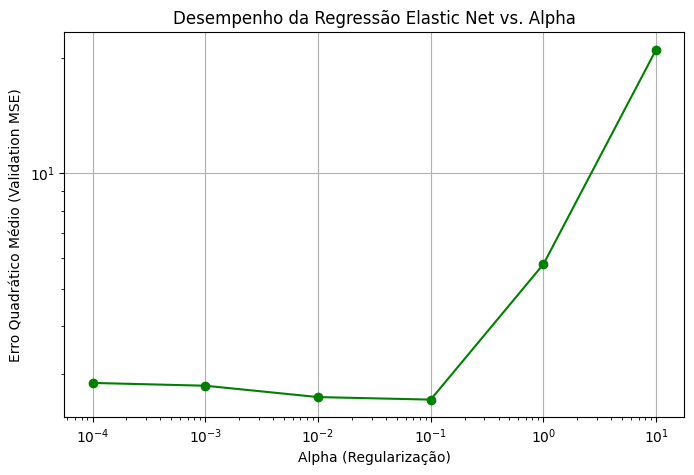

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerando dados de exemplo
np.random.seed(42)
X = np.random.uniform(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 2

# Criando features polinomiais para testar regularização
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)
y_train = y_train.ravel()
y_val = y_val.ravel()

# Lista de alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
elastic_val_mses = []
best_elastic_mse = float('inf')
best_elastic_alpha = None

print("Avaliando a Regressão Elastic Net...")
for alpha in alphas:
    # Pipeline com normalização e ElasticNet
    elastic_model = Pipeline([
        ("scaler", StandardScaler()),
        ("elastic_reg", ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=1000, random_state=42))
    ])
    
    # Treinando o modelo
    elastic_model.fit(X_train, y_train)
    
    # Previsões
    y_pred = elastic_model.predict(X_val)
    
    # MSE
    mse = mean_squared_error(y_val, y_pred)
    elastic_val_mses.append(mse)
    
    print(f"  Alpha: {alpha:<6} -> Validation MSE: {mse:.2f}")
    if mse < best_elastic_mse:
        best_elastic_mse = mse
        best_elastic_alpha = alpha

print(f"\nMelhor alpha para Elastic Net: {best_elastic_alpha} com MSE de validação: {best_elastic_mse:.2f}")

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.plot(alphas, elastic_val_mses, marker='o', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Alpha (Regularização)')
plt.ylabel('Erro Quadrático Médio (Validation MSE)')
plt.title('Desempenho da Regressão Elastic Net vs. Alpha')
plt.grid(True)
plt.show()


## 3. Regularização por Early Stopping

Early stopping é uma forma diferente de regularização. Em vez de adicionar um termo de penalidade, ela interrompe o treinamento assim que o erro no conjunto de validação para de diminuir (ou começa a aumentar), evitando o overfitting.

Para isso, use `SGDRegressor` sem penalidade (`penalty=None`), mas com os parâmetros de early stopping ativados.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerando dados de exemplo
np.random.seed(42)
X = np.random.uniform(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 2

# Criando features polinomiais para aumentar a complexidade
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)
y_train = y_train.ravel()
y_val = y_val.ravel()

print("Avaliando SGD com Early Stopping...")

# ====================== Early Stopping ======================
early_stopping_model = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        penalty=None,
        early_stopping=True,
        n_iter_no_change=1,
        validation_fraction=0.5,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

# Treinando o modelo
early_stopping_model.fit(X_train, y_train)

# Previsões
y_pred = early_stopping_model.predict(X_val)

# MSE
early_stopping_mse = mean_squared_error(y_val, y_pred)
# =============================================================

print(f"MSE de validação do modelo com Early Stopping: {early_stopping_mse:.2f}")


Avaliando SGD com Early Stopping...
MSE de validação do modelo com Early Stopping: 3.66


## 4. Avaliação Final no Conjunto de Teste

Agora que você avaliou todos os modelos no conjunto de validação, é hora de escolher o melhor e avaliá-lo no conjunto de teste. O melhor modelo é aquele que obteve o menor MSE de validação.

1. Compare os melhores MSEs de Ridge, Lasso, Elastic Net e Early Stopping.
2. Identifique (manualmente) o melhor modelo e seu melhor hiperparâmetro alpha (se aplicável).
3. **Importante:** Re-treine este modelo final usando o conjunto de **treinamento + validação** (`X_train_val`, `y_train_val`) para aproveitar o máximo de dados possível.
4. Faça a previsão final no conjunto de **teste** (`X_test`) e calcule o MSE.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Supondo que X_poly e y já estejam definidos
# Separando os dados em treino+validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
y_train_val = y_train_val.ravel()
y_test = y_test.ravel()

# Exibindo os melhores MSEs
print(f"Melhor MSE (Ridge):       {best_ridge_mse:.2f} (alpha={best_ridge_alpha})")
print(f"Melhor MSE (Lasso):       {best_lasso_mse:.2f} (alpha={best_lasso_alpha})")
print(f"Melhor MSE (Elastic Net): {best_elastic_mse:.2f} (alpha={best_elastic_alpha})")
print(f"Melhor MSE (Early Stop):  {early_stopping_mse:.2f}")

# ====================== Avaliação Final ======================
# Supondo que Elastic Net foi o melhor modelo
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("elastic_reg", ElasticNet(alpha=best_elastic_alpha, l1_ratio=0.5, max_iter=1000, random_state=42))
])

# Re-treinando com treino + validação
final_model.fit(X_train_val, y_train_val)

# Previsão no conjunto de teste
y_test_pred = final_model.predict(X_test)

# MSE final
final_mse = mean_squared_error(y_test, y_test_pred)
# =============================================================

print(f"\nMSE final no conjunto de teste do melhor modelo: {final_mse:.2f}")


Melhor MSE (Ridge):       16.38 (alpha=0.1)
Melhor MSE (Lasso):       2.43 (alpha=0.01)
Melhor MSE (Elastic Net): 2.56 (alpha=0.1)
Melhor MSE (Early Stop):  3.66

MSE final no conjunto de teste do melhor modelo: 2.56


## Conclusão

Neste exercício, você:
- Implementou e comparou Regressão Ridge, Lasso e Elastic Net.
- Usou um conjunto de validação para encontrar o melhor hiperparâmetro `alpha` para cada modelo.
- Observou como a Regressão Lasso zerou alguns coeficientes, realizando seleção de features.
- Implementou a regularização por Early Stopping como uma alternativa às penalidades $\ell_1$/$\ell_2$.
- Selecionou o melhor modelo com base no desempenho de validação e o avaliou em um conjunto de teste separado para obter uma estimativa imparcial de seu desempenho em dados novos.